Question 2: Decision Trees for Classification
The bill_authentication.csvPreview the document file is taken from UCI Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/banknote+authentication (Links to an external site.)).

Use this dataset to predict whether a bank note is authentic or fake depending upon the four different attributes of the image of the note. The attributes are Variance of wavelet transformed image, curtosis of the image, entropy, and skewness of the image.

Use Decision Trees to build a classifier for the give data. Use Grid Search to find the optimal value for the hyperparameters, and evaluate your model on suitable metrics. Use graphviz to visualize your decision tree.

In [2]:
#Set the working directory.
import os
os.chdir('C://Users//Admin')
os.getcwd()

'C:\\Users\\Admin'

In [3]:
# Import pandas and numpy libraries.
import pandas as pd
import numpy as np
from pandas import DataFrame

In [4]:
# Read the input dataset.
file = pd.read_csv('bill_authentication.csv')
print(file.dtypes)
file.head()

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [117]:
#Divide dataset into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(file.drop('Class', axis=1), file['Class'],
                                                    test_size=0.3, random_state=123)

In [118]:
#Import Decision Tree Regressor, and GridSearchCV and fit the model to the training data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [119]:
#Let's use GridSearchCV to try max_depth value is limited to maximum of 3(to avoid overfitting model)
#and max_features can be of 2,3,4 or any values  in hyperparameters. 
#Being a medium dataset, Do a K-fold(interval - 10) Cross validation.
param_grid = [{"max_depth":[1, 2, 3], "max_features":[2, 3, 4, None]}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=123),\
                 param_grid = param_grid,\
                 cv=10)

In [120]:
#Fit the model.
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=123,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [1, 2, 3],
                          'max_features': [2, 3, 4, None]}],
             pre_dispatch

In [121]:
#Print out all the hyperparameters combinations that the GridSearchCV has tried.
gs.cv_results_['params']

[{'max_depth': 1, 'max_features': 2},
 {'max_depth': 1, 'max_features': 3},
 {'max_depth': 1, 'max_features': 4},
 {'max_depth': 1, 'max_features': None},
 {'max_depth': 2, 'max_features': 2},
 {'max_depth': 2, 'max_features': 3},
 {'max_depth': 2, 'max_features': 4},
 {'max_depth': 2, 'max_features': None},
 {'max_depth': 3, 'max_features': 2},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': None}]

In [122]:
gs.best_params_

{'max_depth': 3, 'max_features': 3}

In [123]:
# Print the rank for all tried combinations.
gs.cv_results_['rank_test_score']

array([9, 9, 9, 9, 8, 5, 5, 5, 4, 1, 1, 1])

In [124]:
# Fitting the model, with best hyperparameter settings.
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [125]:
#Predict results of test data.
predictions = gs.predict(X_test)

In [126]:
# Calculate accuracy of prediction.
from sklearn.metrics import accuracy_score, confusion_matrix

In [127]:
# Calculate the accuracy of test data of model, with actual results.
accuracy_score(Y_test, predictions)

0.9368932038834952

In [128]:
accuracy_score(Y_test, predictions, normalize=False)

386

In [129]:
#Let's plot confusion matrix for this result.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [130]:
confusion_mat = confusion_matrix(Y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=[0, 1],columns=[0, 1])

In [131]:
confusion_df

,0,1
0,222,11
1,15,164


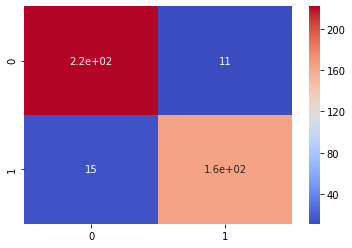

In [132]:
sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

In [133]:
# We can also visualize the tree output using graphviz..
from sklearn.tree import export_graphviz
import graphviz


In [134]:
#Create dot_data file using graphviz
dot_data = export_graphviz(gs.best_estimator_, filled=True, rounded=True, 
                           feature_names=['Variance','Skewness', 'Curtosis', 'Entropy'],out_file=None)

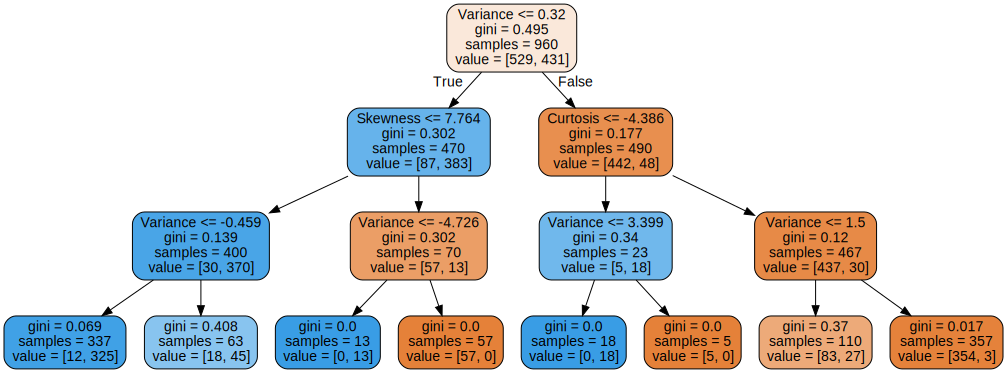

In [135]:
#create a diagrammatic view of decision tree, using graphviz.
graphviz.Source(dot_data)